## Tensors

In [8]:
import pandas as pd
import seaborn as sns

In [11]:
% matplotlib inline

In [17]:
import numpy as np

N, D_in, H, D_out = 65, 1000, 100, 10

x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6

errors = []

for i in range(20):
    # forward pass
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    loss = np.square(y_pred - y).sum()
    errors.append({"iter": i, "loss": loss})
    
    # backprop
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # update
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

errors = pd.DataFrame(errors)

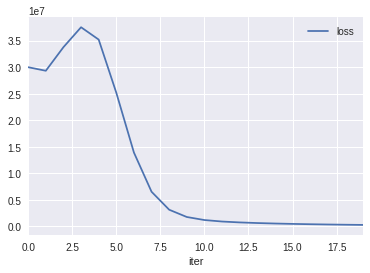

In [18]:
errors.plot(x = "iter", y = "loss")

In [21]:
# using pytorch tensors

In [23]:
import torch

In [30]:
dtype = torch.cuda.FloatTensor

N, D_in, H, D_out = 65, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

# weights
w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6

errors = []

for i in range(20):
    # forward pass
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    errors.append({"iter": i, "loss": loss})
    
    # backprop
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    # update
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

errors = pd.DataFrame(errors)

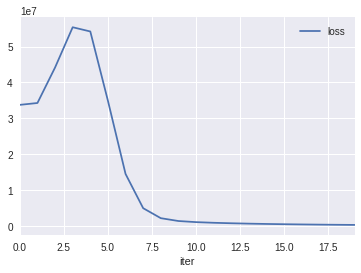

In [31]:
errors.plot(x = "iter", y = "loss")

In [28]:
# Autograd

In [29]:
from torch.autograd import Variable

In [56]:
dtype = torch.FloatTensor

N, D_in, H, D_out = 65, 1000, 100, 10

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

# weights
w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6

errors = []

for i in range(20):
    # forward pass
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    errors.append({"iter": i, "loss": loss.data[0]})
    
    # backprop
    loss.backward()
    
    # update
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    
    w1.grad.data.zero_()
    w2.grad.data.zero_()

errors = pd.DataFrame(errors)

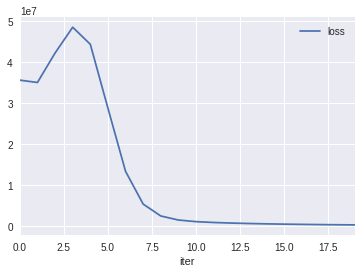

In [57]:
errors.plot(x = "iter", y = "loss")

In [ ]:
# custom autograd function
class MyReLU(torch.autograd.Function):
    def forward(self, input):
        self.save_for_backward(input)
        return input.clamp(min=0)
    
    def backward(self, grad_output):
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

In [60]:
## nn module

import torch.nn as nn

In [67]:
dtype = torch.FloatTensor

N, D_in, H, D_out = 65, 1000, 100, 10

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

model = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out),
)

loss_fn = nn.MSELoss(size_average=False)
learning_rate = 1e-6

errors = []

for i in range(500):
    # forward pass
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    errors.append({"iter": i, "loss": loss.data[0]})
    
    # backprop
    model.zero_grad()
    loss.backward()
    
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

errors = pd.DataFrame(errors)

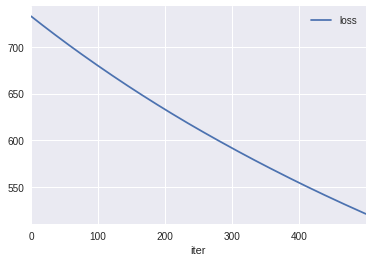

In [68]:
errors.plot(x = "iter", y = "loss")

In [69]:
# optim package
import torch.optim as optim

In [70]:
dtype = torch.FloatTensor

N, D_in, H, D_out = 65, 1000, 100, 10

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

model = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out),
)

loss_fn = nn.MSELoss(size_average=False)
learning_rate = 1e-6

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

errors = []
 
for i in range(500):
    # forward pass
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    errors.append({"iter": i, "loss": loss.data[0]})
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
errors = pd.DataFrame(errors)

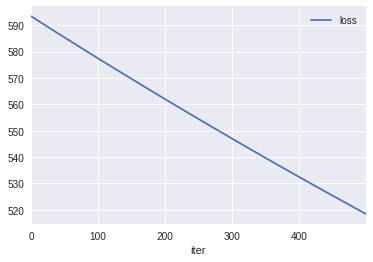

In [71]:
errors.plot(x = "iter", y = "loss")